In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression

In [133]:
from sklearn.linear_model import LinearRegression

In [10]:
lmp = pd.read_csv("lmp_clean.csv")

In [11]:
lmp.head()

,Unnamed: 0,Date,HourID,ID,HB_WEST,DOMINION,SPPNORTH,HB_NORTH,DateTime,Month,Hour
0,1,2016-11-01,7296,1,10.58,21.45,11.83,16.90,2016-11-01 00:00:00,11,0
1,2,2016-11-01,7297,2,7.41,22.01,10.44,14.87,2016-11-01 01:00:00,11,1
2,3,2016-11-01,7298,3,5.74,21.48,11.26,13.79,2016-11-01 02:00:00,11,2
3,4,2016-11-01,7299,4,10.48,22.40,14.95,14.93,2016-11-01 03:00:00,11,3
4,5,2016-11-01,7300,5,15.55,21.94,12.01,15.55,2016-11-01 04:00:00,11,4


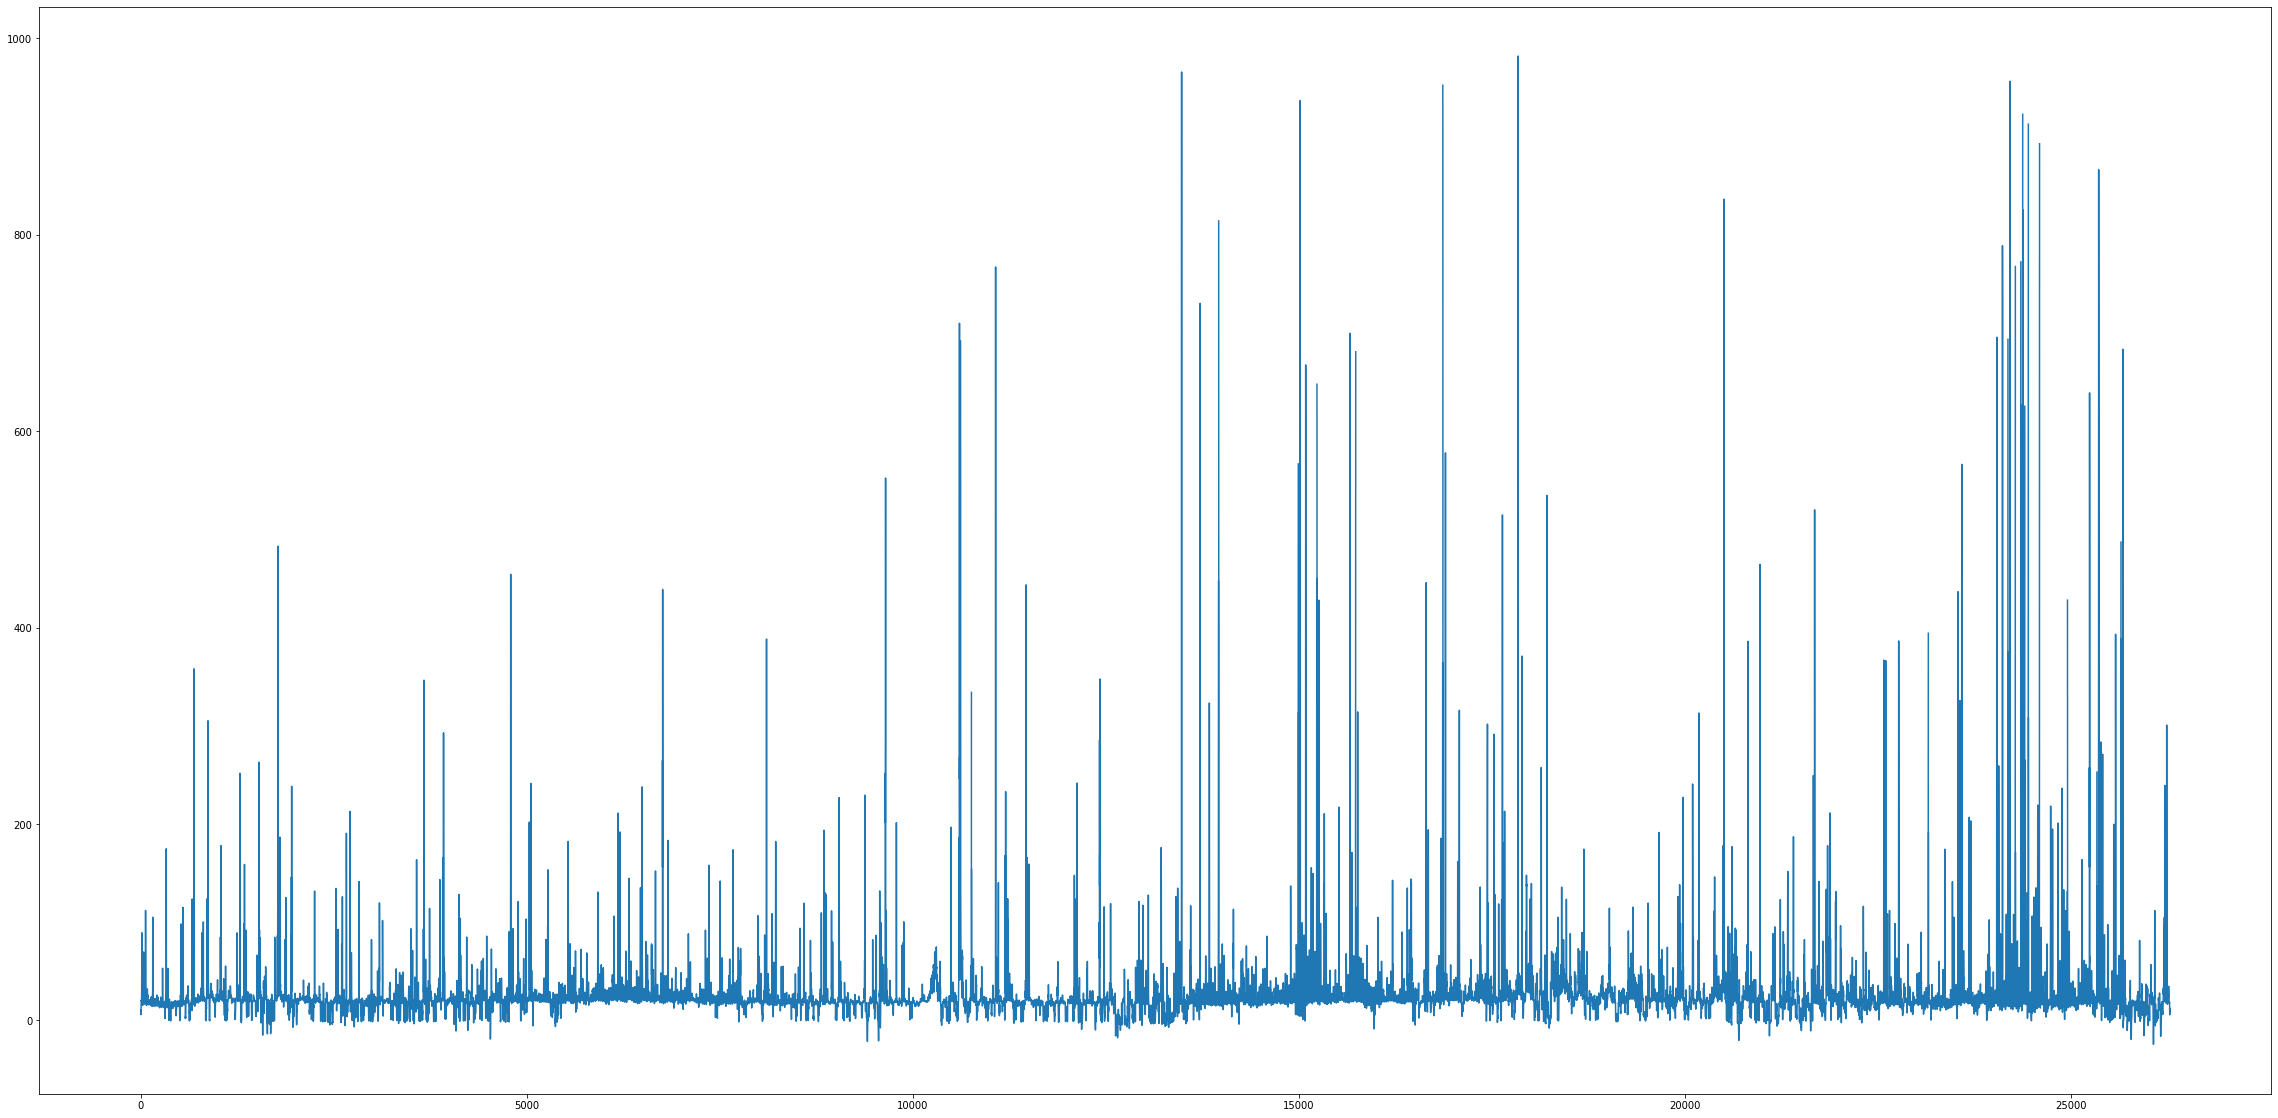

In [18]:
plt.figure(figsize=(40,20))
plt.plot(lmp.ID, lmp.HB_WEST)
plt.show()

In [20]:
lmp_new = lmp.rolling(7).mean().dropna()

In [24]:
lmp_new.head(50)

,Unnamed: 0,HourID,ID,HB_WEST,DOMINION,SPPNORTH,HB_NORTH,Month,Hour
6,4.0,7299.0,4.0,11.950000,22.555714,17.517143,15.050000,11.0,3.000000
7,5.0,7300.0,5.0,13.272857,23.692857,23.557143,15.470000,11.0,4.000000
8,6.0,7301.0,6.0,15.004286,24.481429,25.590000,16.134286,11.0,5.000000
9,7.0,7302.0,7.0,17.001429,25.610000,28.434286,16.970000,11.0,6.000000
10,8.0,7303.0,8.0,18.342857,26.755714,32.597143,17.662857,11.0,7.000000
11,9.0,7304.0,9.0,19.637143,29.467143,67.344286,18.670000,11.0,8.000000
12,10.0,7305.0,10.0,23.082857,35.204286,72.374286,21.638571,11.0,9.000000
13,11.0,7306.0,11.0,28.095714,36.418571,70.830000,25.732857,11.0,10.000000
14,12.0,7307.0,12.0,32.207143,37.611429,67.501429,28.404286,11.0,11.000000
15,13.0,7308.0,13.0,42.147143,37.941429,68.831429,36.315714,11.0,12.000000


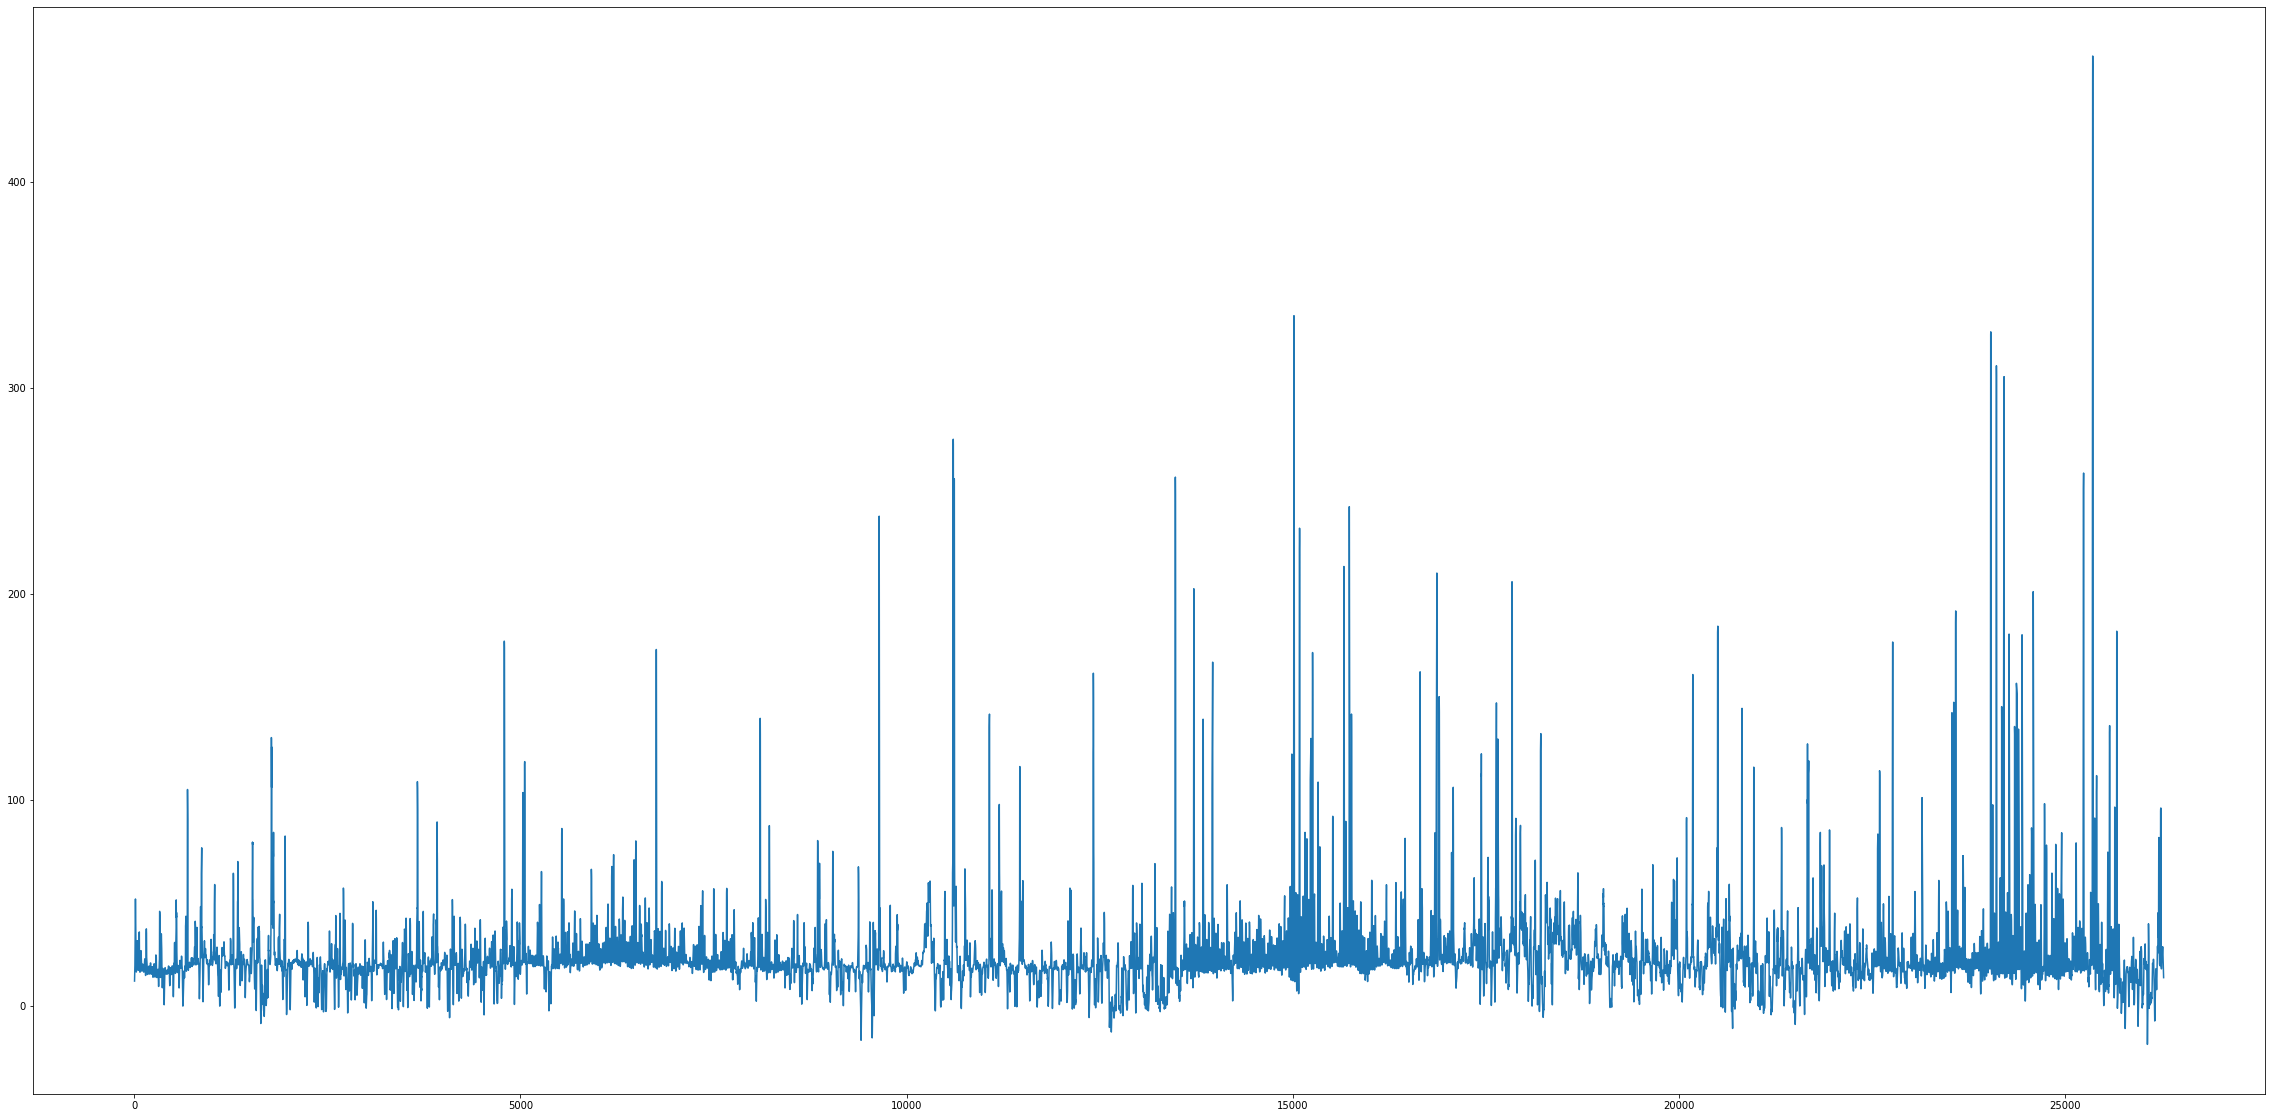

In [23]:
plt.figure(figsize=(40,20))
plt.plot(lmp_new.ID, lmp_new.HB_WEST)
plt.show()

In [ ]:
model = ARIMA(lmp, order=(5,1,0))

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Apply parameters to project market price 2020-2039
import pandas as pd

In [26]:
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows",500)

In [241]:
predict = pd.read_csv("predict_MP.csv")
param = pd.read_csv("param.csv")

In [242]:
predict.head()

,season,month,date,hour,peak
0,Winter,0,1/1/19 0:02,0,off
1,Winter,0,1/1/19 1:02,1,off
2,Winter,0,1/1/19 2:02,2,off
3,Winter,0,1/1/19 3:02,3,off
4,Winter,0,1/1/19 4:02,4,off


In [243]:
param.head()

,Unnamed: 0,season,peak,hub,intercept,coef
0,0,Fall,on,dominion,30.007499,0.033438
1,1,Fall,off,dominion,21.714117,-0.000528
2,2,Fall,on,hubwest,27.921745,-0.101942
3,3,Fall,off,hubwest,15.418778,-0.028781
4,4,Fall,on,hubnorth,30.617433,-0.119517


In [244]:
row = predict.iloc[1416]

In [245]:
row

season         Spring
month               2
date      3/1/19 0:02
hour                0
peak              off
Name: 1416, dtype: object

In [254]:
param.loc[row_n,'intercept'].values[0]

12.860002243409982

In [248]:
row_n = (param.season==row.season)&(param.peak==row.peak)&(param.hub==hub)
intercept = param.loc[row_n,'intercept'].values[0]
coef = param.loc[row_n,'coef'].values[0]

In [252]:
intercept

12.860002243409982

In [253]:
intercept + coef*row.month

12.787747616376892

In [262]:
def cal_mp(row,year):
    row_n = (param.season==row.season)&(param.peak==row.peak)&(param.hub==hub)
    intercept = param.loc[row_n,'intercept'].values[0]
    coef = param.loc[row_n,'coef'].values[0]
    return intercept + coef*(row.month+ 4*(year-2020))

In [256]:
temp = predict.apply(lambda row: cal_mp(row,year=2021), axis=1)

In [257]:
temp

0       20.188187
1       20.188187
2       20.188187
3       20.188187
4       20.188187
          ...    
8755    20.088437
8756    20.088437
8757    20.088437
8758    20.088437
8759    20.088437
Length: 8760, dtype: float64

In [263]:
dominion = predict.copy()
hub = 'dominion'
for year in range(2020,2040):
    dominion[year] = dominion.apply(lambda row: cal_mp(row,year), axis=1)
dominion.to_csv("dominion.csv")

In [264]:
dominion.head()

,season,month,date,hour,peak,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,Winter,0,1/1/19 0:02,0,off,38.163965,38.061705,37.959444,37.857184,37.754923,37.652662,37.550402,37.448141,37.345881,37.24362,37.14136,37.039099,36.936839,36.834578,36.732317,36.630057,36.527796,36.425536,36.323275,36.221015
1,Winter,0,1/1/19 1:02,1,off,38.163965,38.061705,37.959444,37.857184,37.754923,37.652662,37.550402,37.448141,37.345881,37.24362,37.14136,37.039099,36.936839,36.834578,36.732317,36.630057,36.527796,36.425536,36.323275,36.221015
2,Winter,0,1/1/19 2:02,2,off,38.163965,38.061705,37.959444,37.857184,37.754923,37.652662,37.550402,37.448141,37.345881,37.24362,37.14136,37.039099,36.936839,36.834578,36.732317,36.630057,36.527796,36.425536,36.323275,36.221015
3,Winter,0,1/1/19 3:02,3,off,38.163965,38.061705,37.959444,37.857184,37.754923,37.652662,37.550402,37.448141,37.345881,37.24362,37.14136,37.039099,36.936839,36.834578,36.732317,36.630057,36.527796,36.425536,36.323275,36.221015
4,Winter,0,1/1/19 4:02,4,off,38.163965,38.061705,37.959444,37.857184,37.754923,37.652662,37.550402,37.448141,37.345881,37.24362,37.14136,37.039099,36.936839,36.834578,36.732317,36.630057,36.527796,36.425536,36.323275,36.221015


In [265]:
hubwest = predict.copy()
hub = 'hubwest'
for year in range(2020,2040):
    hubwest[year] = hubwest.apply(lambda row: cal_mp(row,year), axis=1)
hubwest.to_csv("hubwest.csv")

In [266]:
hubnorth = predict.copy()
hub = 'hubnorth'
for year in range(2020,2040):
    hubnorth[year] = hubnorth.apply(lambda row: cal_mp(row,year), axis=1)
hubnorth.to_csv("hubnorth.csv")

In [267]:
sppnorth = predict.copy()
hub = 'sppnorth'
for year in range(2020,2040):
    sppnorth[year] = sppnorth.apply(lambda row: cal_mp(row,year), axis=1)
sppnorth.to_csv("sppnorth.csv")

In [268]:
def cal_mp_plus(row,year):
    row_n = (param.season==row.season)&(param.peak==row.peak)&(param.hub==hub)
    intercept = param.loc[row_n,'intercept'].values[0]
    coef = param.loc[row_n,'coef'].values[0]
    return intercept + 1.15*coef*(row.month+ 4*(year-2020))

In [269]:
def cal_mp_minus(row,year):
    row_n = (param.season==row.season)&(param.peak==row.peak)&(param.hub==hub)
    intercept = param.loc[row_n,'intercept'].values[0]
    coef = param.loc[row_n,'coef'].values[0]
    return intercept + 0.85*coef*(row.month+ 4*(year-2020))

In [270]:
hubnorth_plus = predict.copy()
hub = 'hubnorth'
for year in range(2020,2040):
    hubnorth_plus[year] = hubnorth_plus.apply(lambda row: cal_mp_plus(row,year), axis=1)
hubnorth_plus.to_csv("hubnorth_plus.csv")

In [271]:
hubnorth_minus = predict.copy()
hub = 'hubnorth'
for year in range(2020,2040):
    hubnorth_minus[year] = hubnorth_minus.apply(lambda row: cal_mp_minus(row,year), axis=1)
hubnorth_minus.to_csv("hubnorth_minus.csv")

In [155]:
# Prediction of Intercept and Coef (32 cases)
forward = pd.read_csv("forward.csv")
# winter 3, spring 5, summer 8, fall 11

In [215]:
fall = forward[11:].reset_index(drop=True)
winter = forward[3:].reset_index(drop=True)
spring = forward[5:].reset_index(drop=True)
summer = forward[8:].reset_index(drop=True)
param = pd.DataFrame({'season':[],'peak':[],'hub':[],'intercept':[],'coef':[]})

In [216]:
season = "Fall"
for hub in ['dominion','hubwest','hubnorth','sppnorth']:
    for peak in ['on','off']:
        x = fall.loc[(fall.season==season), [hub+"_"+peak]]
        model = LinearRegression()
        model.fit(x.index.values.reshape(-1, 1),x.values.reshape(-1, 1))
        intercept = model.intercept_[0]
        coef = model.coef_[0][0]
        param = param.append({'season':season,'peak':peak,'hub':hub,'intercept':intercept,'coef':coef},ignore_index=True)

In [217]:
season = "Winter"
for hub in ['dominion','hubwest','hubnorth','sppnorth']:
    for peak in ['on','off']:
        x = winter.loc[(winter.season==season), [hub+"_"+peak]]
        model = LinearRegression()
        model.fit(x.index.values.reshape(-1, 1),x.values.reshape(-1, 1))
        intercept = model.intercept_[0]
        coef = model.coef_[0][0]
        param = param.append({'season':season,'peak':peak,'hub':hub,'intercept':intercept,'coef':coef},ignore_index=True)

In [218]:
season = "Spring"
for hub in ['dominion','hubwest','hubnorth','sppnorth']:
    for peak in ['on','off']:
        x = spring.loc[(spring.season==season), [hub+"_"+peak]]
        model = LinearRegression()
        model.fit(x.index.values.reshape(-1, 1),x.values.reshape(-1, 1))
        intercept = model.intercept_[0]
        coef = model.coef_[0][0]
        param = param.append({'season':season,'peak':peak,'hub':hub,'intercept':intercept,'coef':coef},ignore_index=True)

In [219]:
season = "Summer"
for hub in ['dominion','hubwest','hubnorth','sppnorth']:
    for peak in ['on','off']:
        x = summer.loc[(summer.season==season), [hub+"_"+peak]]
        model = LinearRegression()
        model.fit(x.index.values.reshape(-1, 1),x.values.reshape(-1, 1))
        intercept = model.intercept_[0]
        coef = model.coef_[0][0]
        param = param.append({'season':season,'peak':peak,'hub':hub,'intercept':intercept,'coef':coef},ignore_index=True)

In [220]:
param

,season,peak,hub,intercept,coef
0,Fall,on,dominion,30.007499,0.033438
1,Fall,off,dominion,21.714117,-0.000528
2,Fall,on,hubwest,27.921745,-0.101942
3,Fall,off,hubwest,15.418778,-0.028781
4,Fall,on,hubnorth,30.617433,-0.119517
5,Fall,off,hubnorth,18.765754,-0.032796
6,Fall,on,sppnorth,24.088015,-0.051408
7,Fall,off,sppnorth,12.766101,-0.037876
8,Winter,on,dominion,46.922632,-0.020960
9,Winter,off,dominion,38.163965,-0.025565


In [221]:
param.to_csv("param.csv")

In [158]:
x = fall.loc[(fall.season=="Fall"),'dominion_on']

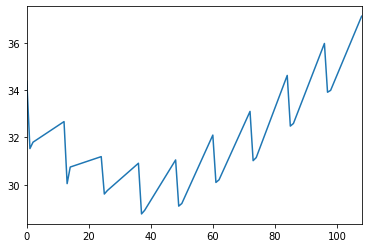

In [159]:
x.plot()

In [182]:
model = LinearRegression()
model.fit(x.index.values.reshape(-1, 1),x.values.reshape(-1, 1))
initial = model.intercept_[0]
slope = model.coef_[0]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
intercept = model.intercept_[0]
coef = model.coef_[0]

In [192]:
param = pd.DataFrame({'season':[],'peak':[],'hub':[],'intercept':[],'coef':[]})
season = "Fall"
for hub in ['dominion','hubwest','hubnorth','sppnorth']:
    for peak in ['on','off']:
        x = fall.loc[(fall.season=="Fall"), fall[hub+"_"+peak]]
        model = LinearRegression()
        model.fit(x.index.values.reshape(-1, 1),x.values.reshape(-1, 1))
        intercept = model.intercept_[0]
        coef = model.coef_[0]
        param.append({'season':season,'peak':peak,'hub':hub,'intercept':intercept,'coef':coef},ignore_index=True)

0      34.38
1      31.53
2      31.80
3      37.52
4      54.30
5      51.48
6      37.35
7      32.07
8      31.79
9      30.44
10     35.41
11     34.79
12     32.67
13     30.05
14     30.75
15     36.63
16     52.07
17     49.01
18     34.99
19     30.48
20     29.43
21     30.44
22     36.36
23     33.69
24     31.19
25     29.61
26     29.76
27     34.34
28     50.76
29     47.81
30     34.47
31     30.21
32     29.69
33     30.06
34     35.96
35     33.31
36     30.91
37     28.77
38     28.92
39     33.57
40     48.14
41     45.28
42     34.63
43     30.51
44     30.16
45     30.33
46     36.12
47     33.52
48     31.05
49     29.10
50     29.21
51     33.76
52     48.41
53     45.33
54     34.64
55     30.47
56     30.05
57     30.36
58     37.31
59     34.64
60     32.10
61     30.10
62     30.21
63     34.62
64     49.50
65     46.25
66     35.39
67     31.31
68     30.90
69     31.21
70     38.34
71     35.68
72     33.10
73     31.02
74     31.15
75     35.76
76     51.14